# < Deep Learning - PART3 TF2 RNNs >

# Ch 6. RNNs Workshop 4 - NLP - RNNs - IMDB : Bidirectional LSTM & GRU
2021/10/01

>**[ Reference ] :**

> 1. Keras Documentation, **Trains a Bidirectional LSTM on the IMDB sentiment classification task** https://keras.io/zh/examples/imdb_bidirectional_lstm/
>
>
> 2. François Chollet, **Deep Learning with Python**, Chapter 6, Section 2, Manning, 2018.
[Code] : https://github.com/fchollet/deep-learning-with-python-notebooks

> 3. Wikipedia, **Recurrent neural network** https://en.wikipedia.org/wiki/Recurrent_neural_network
    + Wikipedia, **Long short-term memory** https://en.wikipedia.org/wiki/Long_short-term_memory

> 4. Andrej Karpathy blog,
“**The Unreasonable Effectiveness of Recurrent Neural Networks**”
https://karpathy.github.io/2015/05/21/rnn-effectiveness/
>
>
> 5. Wikipedia, **Bidirectional recurrent neural networks** https://en.wikipedia.org/wiki/Bidirectional_recurrent_neural_networks

> 6. Wikipedia, **Gated recurrent unit** https://en.wikipedia.org/wiki/Gated_recurrent_unit
> 7. Tom Hope, Yehezkel S. Resheff, and Itay Lieder, "**`Learning TensorFlow : A Guide to Building Deep Learning Systems`**", Chapter 6, O'Reilly, 2017. - [ Code ] : https://github.com/giser-yugang/Learning_TensorFlow

---

#### [1. IMDB with Bidirectional LSTM](#LSTM)
#### [2. IMDB with Bidirectional GRU](#GRU)
--------

## Bidirectional RNN layers (LSTM & GRU)
+ Bidirectional RNN layers consist of, in their basic form, is two ordinary RNN layers: 
    - one layer that reads the sequence from left to right, and 
    - another that reads from right to left.
    - Each yields a hidden representation, the left-to-right vector, and the right-to-left vector. 
    - These are then concatenated into one vector. 
    - The major advantage of this representation is its ability to capture the context of words from both directions, which enables richer understanding of natural language and the underlying semantics in text. 
    - In practice, in complex tasks, it often leads to improved accuracy.

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

<a id='LSTM'></a>
## 1. IMDB with Bidirectional LSTM


In [2]:
from __future__ import print_function
import numpy as np

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.datasets import imdb

In [3]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 256

### Loading IMDB dataset

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [6]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Bidirectional LSTM 

In [7]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [9]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=[x_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.4990 - accuracy: 0.7445 - val_loss: 0.3436 - val_accuracy: 0.8474
Epoch 2/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.2508 - accuracy: 0.9011 - val_loss: 0.3408 - val_accuracy: 0.8496
Epoch 3/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.1700 - accuracy: 0.9391 - val_loss: 0.3971 - val_accuracy: 0.8400
Epoch 4/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.1127 - accuracy: 0.9624 - val_loss: 0.4693 - val_accuracy: 0.8313
Epoch 5/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.0789 - accuracy: 0.9750 - val_loss: 0.6139 - val_accuracy: 0.8199
Epoch 6/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.0587 - accuracy: 0.9806 - val_loss: 0.6681 - val_accuracy: 0.8109
Epoch 7/10
25000/25000 [=======================

### Evalution

In [10]:
model.evaluate(x_test, y_test, verbose=2)

25000/1 - 21s - loss: 1.0246 - accuracy: 0.8181


[0.7756469815397262, 0.81812]

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

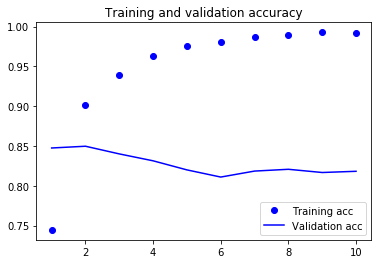

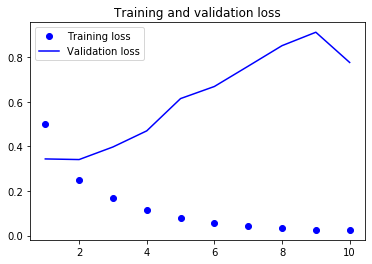

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<a id='GRU'></a>
## 2. IMDB with Bidirectional GRU (Gated Recurrent Unit)

+ Gated recurrent unit (GRU) cells are a simplification of sorts of LSTM cells. 
+ They also have a memory mechanism, but with considerably fewer parameters than LSTM.
+ They are often used when there is less available data, and are faster to compute. 

### Bidirectional GRU

In [13]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, Bidirectional

gru_model = Sequential()
gru_model.add(Embedding(max_features, 128, input_length=maxlen))
gru_model.add(Bidirectional(GRU(64)))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation='sigmoid'))

In [14]:
# try using different optimizers and different optimizer configs
gru_model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [15]:
print('Bidirectional GRU...')
gru_history = gru_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=10,
                        validation_data=[x_test, y_test])

Bidirectional GRU...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.5324 - accuracy: 0.7148 - val_loss: 0.3576 - val_accuracy: 0.8449
Epoch 2/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.2672 - accuracy: 0.8936 - val_loss: 0.3476 - val_accuracy: 0.8499
Epoch 3/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.1676 - accuracy: 0.9406 - val_loss: 0.4293 - val_accuracy: 0.8404
Epoch 4/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.1075 - accuracy: 0.9643 - val_loss: 0.4934 - val_accuracy: 0.8329
Epoch 5/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.0619 - accuracy: 0.9796 - val_loss: 0.6604 - val_accuracy: 0.8286
Epoch 6/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.7159 - val_accuracy: 0.8259
Epoch 7/10
25000/25000 [===========

In [16]:
gru_model.evaluate(x_test, y_test, verbose=2)

25000/1 - 18s - loss: 1.2307 - accuracy: 0.8174


[1.062934914600849, 0.81744]

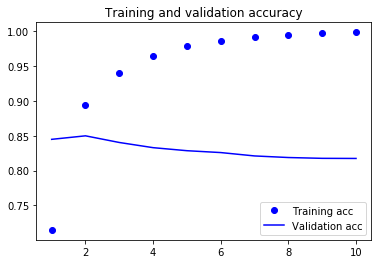

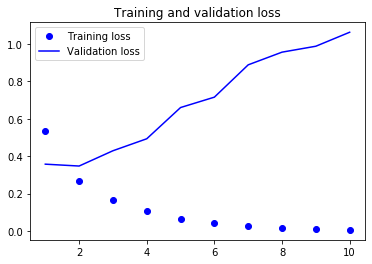

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = gru_history.history['accuracy']
val_acc = gru_history.history['val_accuracy']
loss = gru_history.history['loss']
val_loss = gru_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Q1: What are the differences between Bidir. LSTM & Bidir. GRU models?

### Q2: How to improve performances of both Bidir. LSTM & Bidir. GRU models?